A grid-search has then been run to identify the optimal parameters among the ones fed to the algorithm:

In [84]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.025,0.05,0.075, 0.1],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid,train_dataset)

0:	learn: 2.3747091	test: 2.3600307	best: 2.3600307 (0)	total: 66.3ms	remaining: 6.56s
1:	learn: 2.3258761	test: 2.3112916	best: 2.3112916 (1)	total: 72ms	remaining: 3.53s
2:	learn: 2.2795720	test: 2.2650144	best: 2.2650144 (2)	total: 74ms	remaining: 2.39s
3:	learn: 2.2346649	test: 2.2201536	best: 2.2201536 (3)	total: 76.2ms	remaining: 1.83s
4:	learn: 2.1886092	test: 2.1748669	best: 2.1748669 (4)	total: 79.7ms	remaining: 1.51s
5:	learn: 2.1457486	test: 2.1322492	best: 2.1322492 (5)	total: 82.7ms	remaining: 1.3s
6:	learn: 2.1020531	test: 2.0891029	best: 2.0891029 (6)	total: 86.1ms	remaining: 1.14s
7:	learn: 2.0595092	test: 2.0478987	best: 2.0478987 (7)	total: 89.1ms	remaining: 1.02s
8:	learn: 2.0186370	test: 2.0076908	best: 2.0076908 (8)	total: 91.9ms	remaining: 929ms
9:	learn: 1.9785888	test: 1.9689526	best: 1.9689526 (9)	total: 94ms	remaining: 846ms
10:	learn: 1.9397263	test: 1.9308295	best: 1.9308295 (10)	total: 97.4ms	remaining: 788ms
11:	learn: 1.9045549	test: 1.8957570	best: 1.895

{'params': {'depth': 10,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.075},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

The moel has the been fit on the optimal hyperparameters:

In [85]:
model = cb.CatBoostRegressor(depth= 10,l2_leaf_reg= 1,iterations=200,learning_rate= 0.075,loss_function="RMSE")
model.fit(train_dataset)

0:	learn: 1.0063639	total: 11.1ms	remaining: 2.22s
1:	learn: 0.9768262	total: 15.1ms	remaining: 1.5s
2:	learn: 0.9444647	total: 27.5ms	remaining: 1.81s
3:	learn: 0.9145371	total: 36.4ms	remaining: 1.78s
4:	learn: 0.8870024	total: 47.7ms	remaining: 1.86s
5:	learn: 0.8619501	total: 57.8ms	remaining: 1.87s
6:	learn: 0.8407577	total: 66.9ms	remaining: 1.84s
7:	learn: 0.8288552	total: 68.3ms	remaining: 1.64s
8:	learn: 0.8115300	total: 77.6ms	remaining: 1.65s
9:	learn: 0.7926340	total: 86.2ms	remaining: 1.64s
10:	learn: 0.7774517	total: 94.7ms	remaining: 1.63s
11:	learn: 0.7615223	total: 102ms	remaining: 1.6s
12:	learn: 0.7483207	total: 109ms	remaining: 1.57s
13:	learn: 0.7356601	total: 118ms	remaining: 1.57s
14:	learn: 0.7272652	total: 120ms	remaining: 1.48s
15:	learn: 0.7170380	total: 128ms	remaining: 1.47s
16:	learn: 0.7063044	total: 136ms	remaining: 1.47s
17:	learn: 0.6987683	total: 143ms	remaining: 1.45s
18:	learn: 0.6895710	total: 151ms	remaining: 1.44s
19:	learn: 0.6825605	total: 160m

And the feature importances have been obtained:

Text(0.5, 0, 'CatBoost Feature Importance')

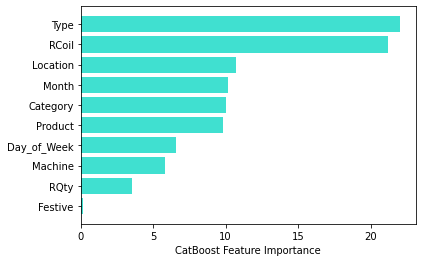

In [86]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(n_db.columns[sorted_feature_importance], model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

Once the importances have been devised, let us asses the performance of the algorithm:

In [87]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.65
R2: 0.61


# PART B (Preparation of the datasets to be used on STATA to analyze survey results)

The starting point is the import of the survey dataset:

In [90]:
df = pd.read_csv("H-FARM INNOVATION business case_November 19, 2022_11.57.csv", sep = ";")

Where the column concerning the card is null, we associated a 1 in the newly created "Non_user" column:

In [92]:
l = np.where(df["Q10"].isnull())[0]

In [93]:
df["Non_user"] = 0

In [94]:
for i in l:
    df.at[i, "Non_user"] = 1

A similar procedure was carried out for the credit card users:

In [95]:
df["Card_y"] = 0

In [96]:
n = np.where(df["Q10"]==1.0)

In [97]:
for i in n:
    df.at[i, "Card_y"] = 1

and also for the cash users:

In [98]:
df["Card_n"] = 0

In [99]:
m = np.where(df["Q10"]==0.0)

In [100]:
for i in m:
    df.at[i, "Card_n"] = 1

Then, the column concerning card ussage has been dropped since now its information is stored in the previously created columns:

In [101]:
df = df.drop("Q10", axis=1)

We created the df1 dataset containing only student observations and the df2 containing only worker observations:

In [104]:
df1 = df.drop("Usage Workplace", axis=1)

In [105]:
df1 = df1.dropna()

In [106]:
df2 = df.drop("Usage Library", axis=1)

In [107]:
df2 = df2.dropna()

In [108]:
df1.to_csv("df_stud.csv")
df2.to_csv("df_work.csv")

# PART C (Preparation of the datasets to be used on STATA to analyze A/B survey's results)

We import the relevent datasets and remove excess rows:

In [110]:
df1 = pd.read_csv("A_B test_November 26, 2022_07.00.csv", sep = ";")

In [111]:
df1 = df1.drop([0,1,2], axis = 0)

In [113]:
df2 = pd.read_csv("A_B test 2_November 26, 2022_07.02.csv", sep = ";")

In [115]:
df2 = df2.drop([0,1,2], axis = 0)

We concatenate the two datasets to build a new one:

In [116]:
df_final = df1.append(df2)

And we create a new column containing the offer type showed to the respondent:

In [117]:
l = [0]*100+[1]*103

In [118]:
df_final["offer_type"] = l

We then renamed the columns for easiness of procedures:

In [119]:
df_final.rename(columns={"Q3":"age", "Q4":"NJ resident", "Q5":"occupation", "Q7_1": "vending_user", "Q9": "nonuser_to_app", "Q10_1":"card_yn", "Unnamed: 6":"cash_to_app"}, inplace=True)

and dropped rows corresponding to those who pay with credit card:

In [120]:
df_final = df_final.dropna(axis=0, subset=["nonuser_to_app", "cash_to_app"], how="all")

Before exporting the csv to be used on STATA, we combined the observations for non users with the ones for cash users in a single column named "propensity":

In [121]:
df_final["propensity"] = df_final["nonuser_to_app"].fillna(df_final["cash_to_app"])

In [122]:
df_final.to_csv("df_final_ab.csv")